In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_excel("Downloads/Stock.xlsx")

In [12]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [15]:
data = data.sort_values(by=['Stock Name', 'Date']).reset_index(drop=True)

In [17]:
print(data.head())

        Date  Close   High    Low   Open   Volume Stock Name
0 2015-01-01  217.2  217.8  215.6  217.0  3544940       HDFC
1 2015-01-02  220.3  221.2  216.9  216.9  5900384       HDFC
2 2015-01-05  218.4  221.5  217.9  221.3  4796000       HDFC
3 2015-01-06  215.0  218.3  213.9  217.7  8219680       HDFC
4 2015-01-07  215.6  217.1  213.6  214.4  5746112       HDFC


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        17490 non-null  datetime64[ns]
 1   Close       17490 non-null  float64       
 2   High        17490 non-null  float64       
 3   Low         17490 non-null  float64       
 4   Open        17490 non-null  float64       
 5   Volume      17490 non-null  int64         
 6   Stock Name  17490 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 956.6+ KB
None


In [21]:
data['Daily_Return'] = (data['Close'] - data['Open']) / data['Open'] * 100

In [23]:
data['Range'] = data['High'] - data['Low']

In [29]:
data['MA_10'] = data.groupby('Stock Name')['Close'].transform(lambda x: x.rolling(10).mean())
data['MA_50'] = data.groupby('Stock Name')['Close'].transform(lambda x: x.rolling(50).mean())

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17490 non-null  datetime64[ns]
 1   Close         17490 non-null  float64       
 2   High          17490 non-null  float64       
 3   Low           17490 non-null  float64       
 4   Open          17490 non-null  float64       
 5   Volume        17490 non-null  int64         
 6   Stock Name    17490 non-null  object        
 7   Daily_Return  17490 non-null  float64       
 8   Range         17490 non-null  float64       
 9   MA_10         17445 non-null  float64       
 10  MA_50         17245 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.5+ MB
None


In [29]:
print(data.head())

        Date  Close   High    Low   Open   Volume Stock Name  Daily_Return  \
0 2015-01-01  217.2  217.8  215.6  217.0  3544940       HDFC      0.092166   
1 2015-01-02  220.3  221.2  216.9  216.9  5900384       HDFC      1.567543   
2 2015-01-05  218.4  221.5  217.9  221.3  4796000       HDFC     -1.310438   
3 2015-01-06  215.0  218.3  213.9  217.7  8219680       HDFC     -1.240239   
4 2015-01-07  215.6  217.1  213.6  214.4  5746112       HDFC      0.559701   

   Range  MA_10  MA_50  
0    2.2    NaN    NaN  
1    4.3    NaN    NaN  
2    3.6    NaN    NaN  
3    4.4    NaN    NaN  
4    3.5    NaN    NaN  


In [31]:
print(data.tail())

            Date        Close         High          Low         Open   Volume  \
17485 2024-12-24  4039.005127  4076.210940  4018.517581  4018.517581  1181886   
17486 2024-12-26  4028.955322  4058.768390  4003.877446  4039.005631  1208464   
17487 2024-12-27  4024.848145  4040.407035  4007.839676  4023.060238   858100   
17488 2024-12-30  4019.001221  4058.139808  3973.774597  4011.463607  1527169   
17489 2024-12-31  3957.152832  4000.785251  3896.512181  3996.001457  1555429   

      Stock Name  Daily_Return       Range        MA_10        MA_50  
17485        TCS      0.509828   57.693359  4177.473901  4057.361968  
17486        TCS     -0.248831   54.890945  4152.507324  4058.183726  
17487        TCS      0.044441   32.567359  4124.472559  4059.306069  
17488        TCS      0.187902   84.365211  4094.021802  4060.732754  
17489        TCS     -0.972187  104.273070  4063.058813  4060.651577  


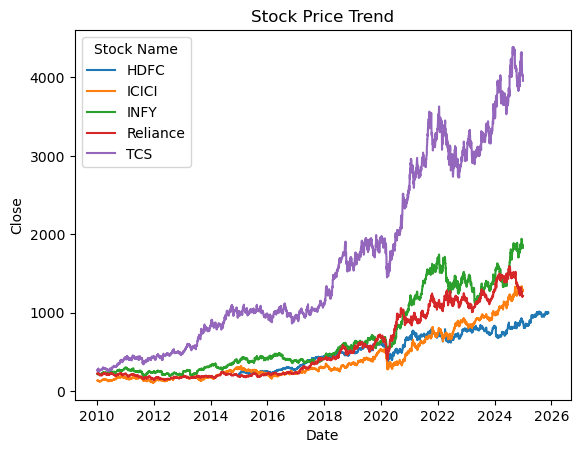

In [33]:
sns.lineplot(data=data, x='Date', y='Close', hue='Stock Name')
plt.title("Stock Price Trend")
plt.show()

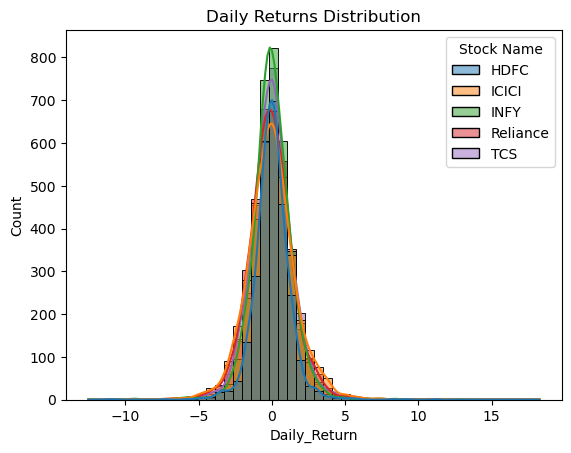

In [35]:
sns.histplot(data=data, x='Daily_Return', hue='Stock Name', bins=50, kde=True)
plt.title("Daily Returns Distribution")
plt.show()

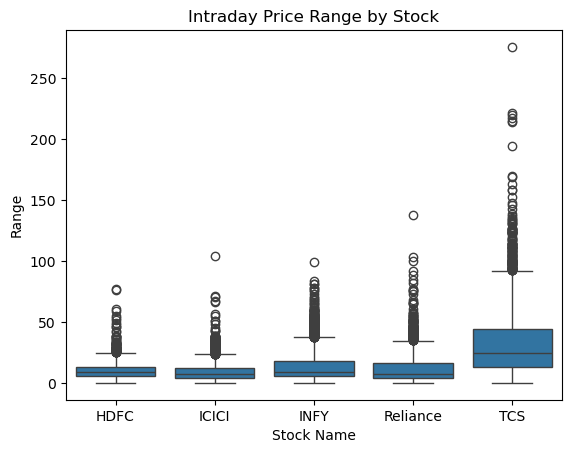

In [37]:
sns.boxplot(data=data, x='Stock Name', y='Range')
plt.title("Intraday Price Range by Stock")
plt.show()

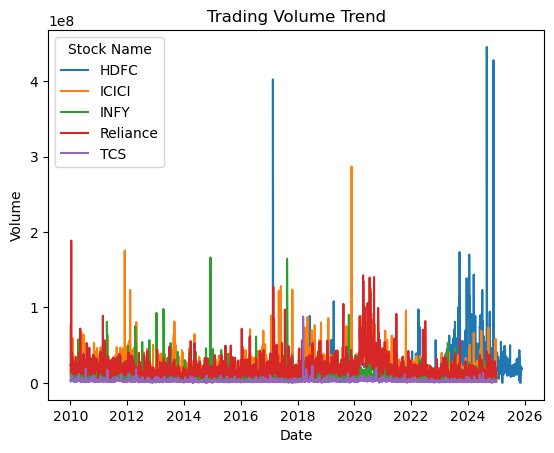

In [39]:
sns.lineplot(data=data, x='Date', y='Volume', hue='Stock Name')
plt.title("Trading Volume Trend")
plt.show()

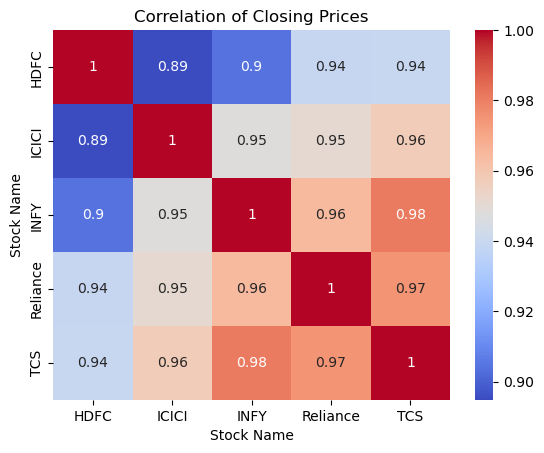

In [41]:
pivot = data.pivot(index='Date', columns='Stock Name', values='Close')
sns.heatmap(pivot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Closing Prices")
plt.show()

In [47]:
summary = data.groupby('Stock Name').agg({
    'Close': ['mean','max','min'],
    'Daily_Return': ['mean','std','max','min'],
    'Volume': ['mean','max']
}).reset_index()

print(summary)

  Stock Name        Close                          Daily_Return            \
                     mean          max         min         mean       std   
0       HDFC   575.213086  1012.900000  215.000000     0.000147  1.217150   
1      ICICI   411.681685  1335.792847  101.825485    -0.026992  1.726211   
2       INFY   676.983823  1942.221191  189.058029     0.007641  1.390655   
3   Reliance   549.754460  1589.138062  139.710220    -0.077061  1.561583   
4        TCS  1620.736554  4389.965332  249.095337    -0.013805  1.420885   

                               Volume             
         max        min          mean        max  
0  11.181146 -10.975348  1.781757e+07  445342100  
1  18.251405  -9.766585  1.952857e+07  286857658  
2  12.988503 -12.510243  8.507684e+06  166320408  
3  12.289890 -10.152813  1.791526e+07  188649642  
4  10.273003  -7.045695  2.746773e+06   88067154  


In [8]:
data['Year'] = data['Date'].dt.year

annual_return = data.groupby(['Stock Name','Year'])['Close'].last() / \
                data.groupby(['Stock Name','Year'])['Close'].first() - 1

print(annual_return)


Stock Name  Year
HDFC        2015    0.145488
            2016    0.117060
            2017    0.574414
            2018    0.151375
            2019    0.194489
                      ...   
TCS         2020    0.346004
            2021    0.290613
            2022   -0.135200
            2023    0.204612
            2024    0.094985
Name: Close, Length: 71, dtype: float64


In [23]:
pivot = data.pivot(index='Date', columns='Stock Name', values='Close')
print(pivot.corr())


Stock Name      HDFC     ICICI      INFY  Reliance       TCS
Stock Name                                                  
HDFC        1.000000  0.894823  0.904124  0.939123  0.939358
ICICI       0.894823  1.000000  0.948207  0.950938  0.957317
INFY        0.904124  0.948207  1.000000  0.964004  0.981088
Reliance    0.939123  0.950938  0.964004  1.000000  0.974946
TCS         0.939358  0.957317  0.981088  0.974946  1.000000


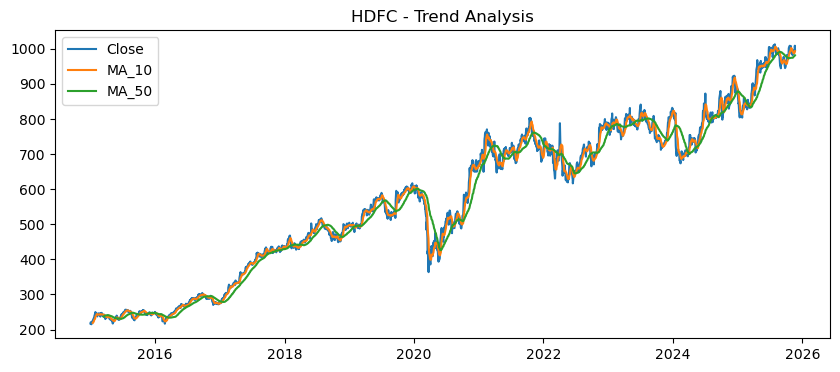

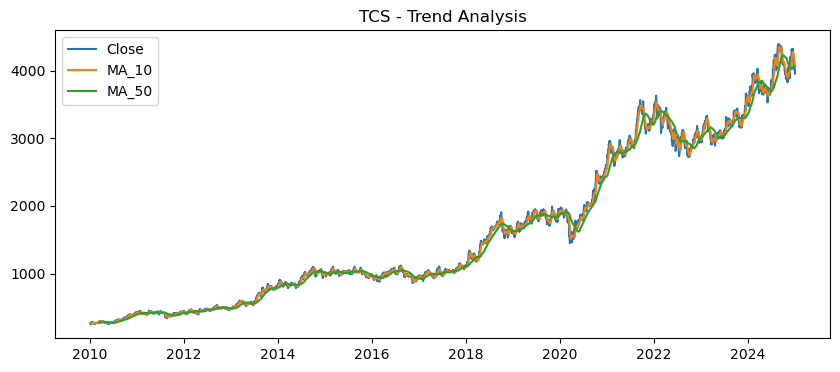

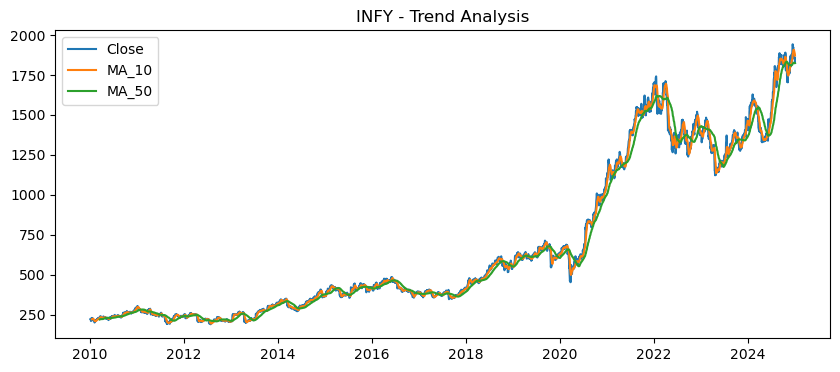

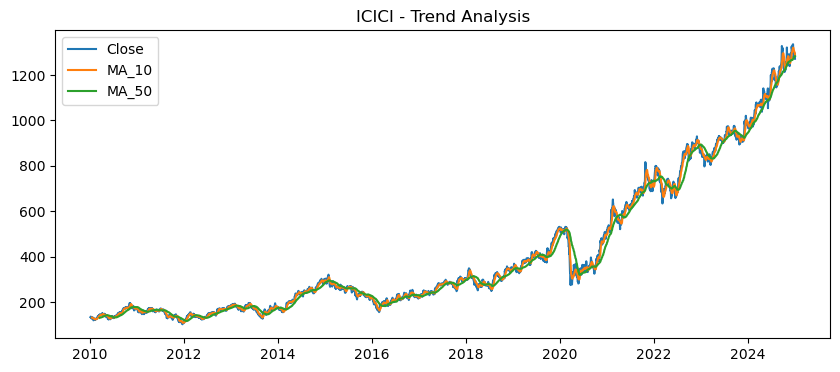

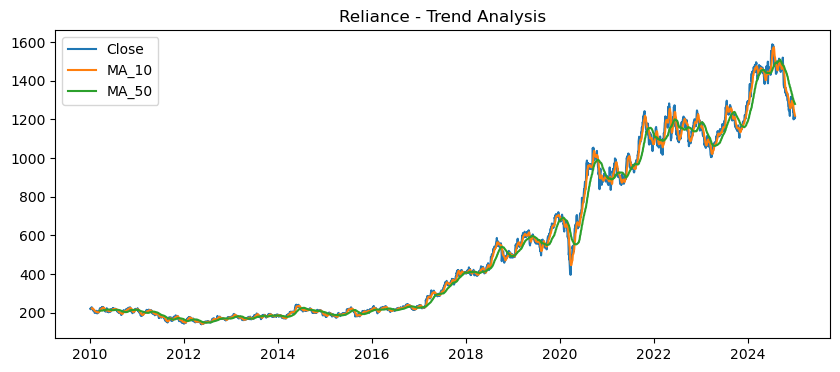

In [31]:
import matplotlib.pyplot as plt

stocks = data['Stock Name'].unique()

for stock in stocks:
    temp = data[data['Stock Name'] == stock]
    plt.figure(figsize=(10,4))
    plt.plot(temp['Date'], temp['Close'], label='Close')
    plt.plot(temp['Date'], temp['MA_10'], label='MA_10')
    plt.plot(temp['Date'], temp['MA_50'], label='MA_50')
    plt.title(f"{stock} - Trend Analysis")
    plt.legend()
    plt.show()
